## <font size=5> <strong>Heart Disease Prediction By Greeshmanth


## I. Importing essential libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['app.py', 'heart disease dataset.csv', 'Heart_disease_prediction.ipynb', 'modl.pkl', 'static', 'templates']


In [71]:
import joblib
import pickle

## II. Importing and understanding our dataset

In [72]:
dataset = pd.read_csv("heart disease dataset.csv")

#### Verifying it as a 'dataframe' object in pandas

In [73]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [74]:
dataset.shape

(1025, 14)

#### Printing out a few columns

In [75]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [76]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
615,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
114,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
147,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
823,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
429,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0


#### Description

In [77]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [79]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [80]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [81]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [82]:
dataset["target"].unique()

array([0, 1], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [83]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [84]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    526
0    499
Name: count, dtype: int64


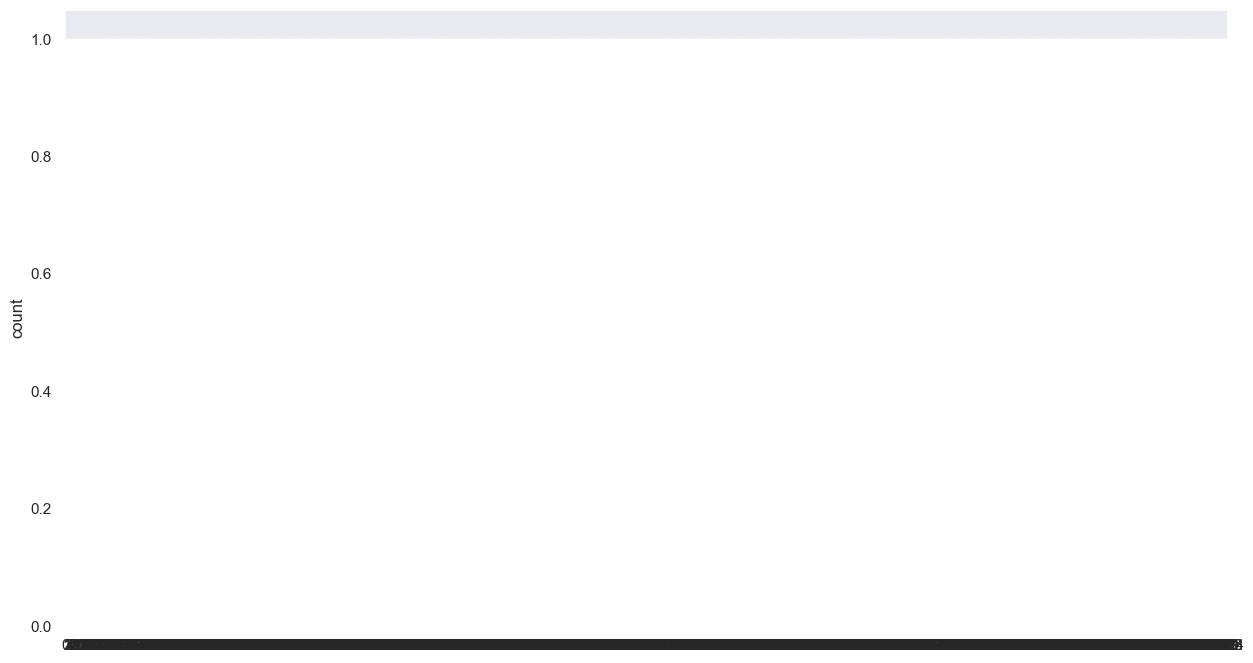

In [85]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [86]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [87]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: ylabel='sex'>

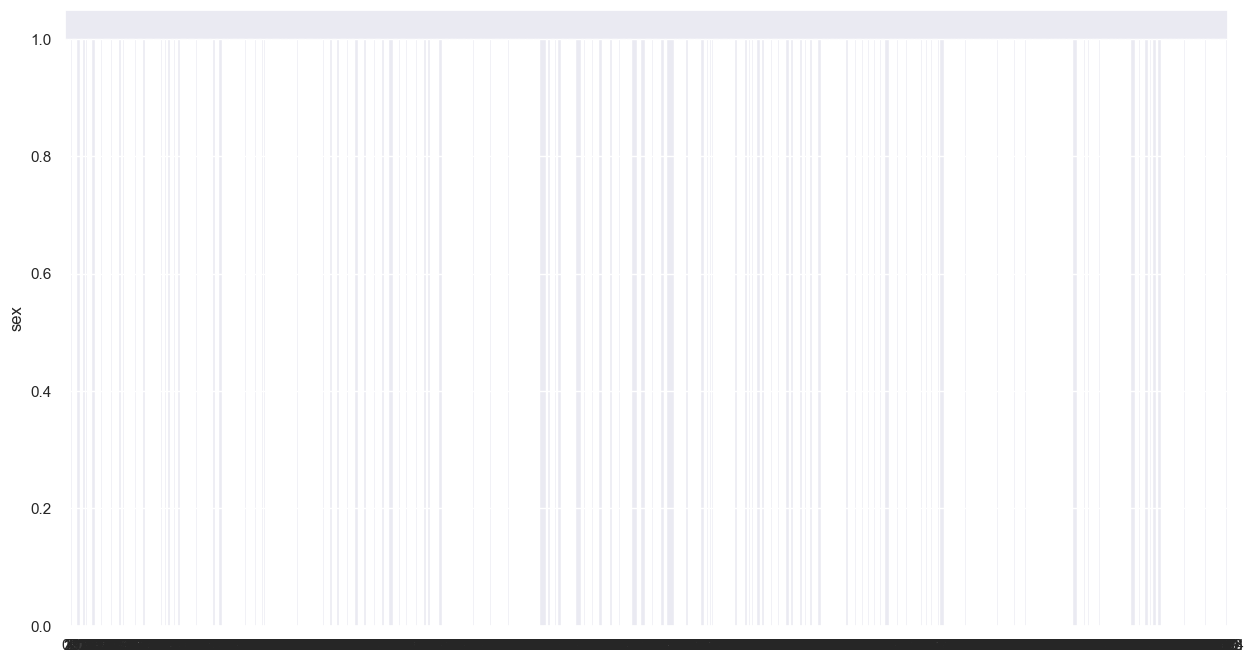

In [88]:
sns.barplot(dataset["sex"])

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [89]:
dataset["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<Axes: ylabel='cp'>

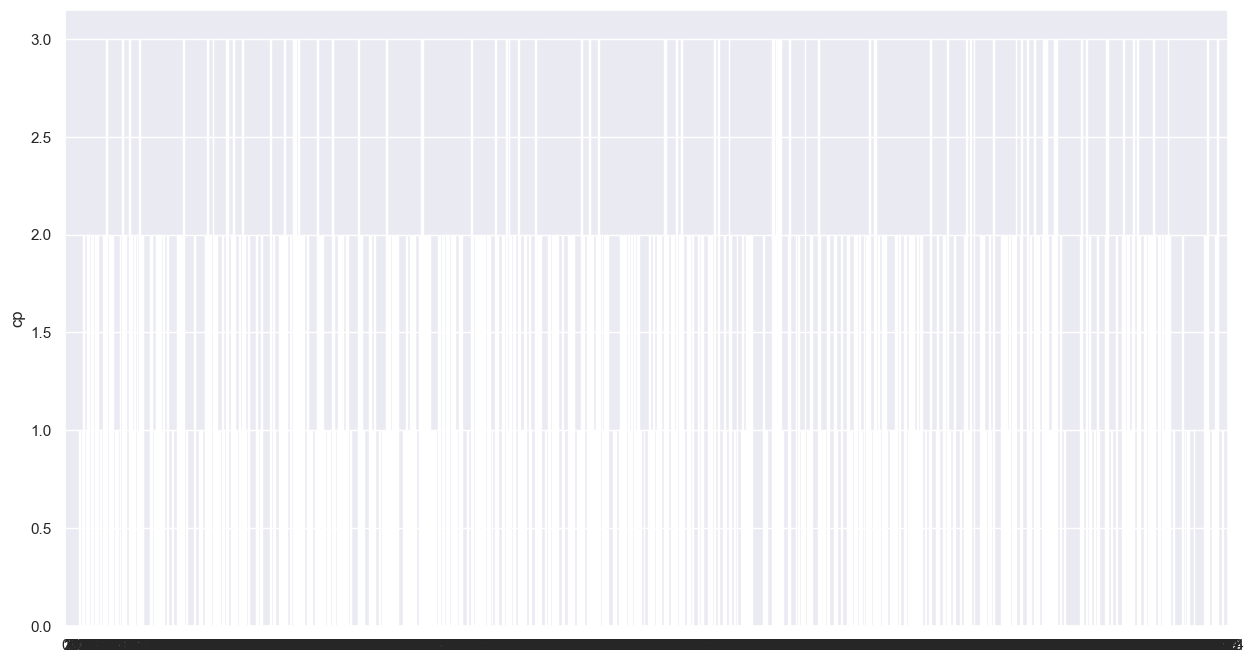

In [90]:
sns.barplot(dataset["cp"])

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

In [91]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [92]:
dataset["fbs"].unique()

array([0, 1], dtype=int64)

<Axes: ylabel='fbs'>

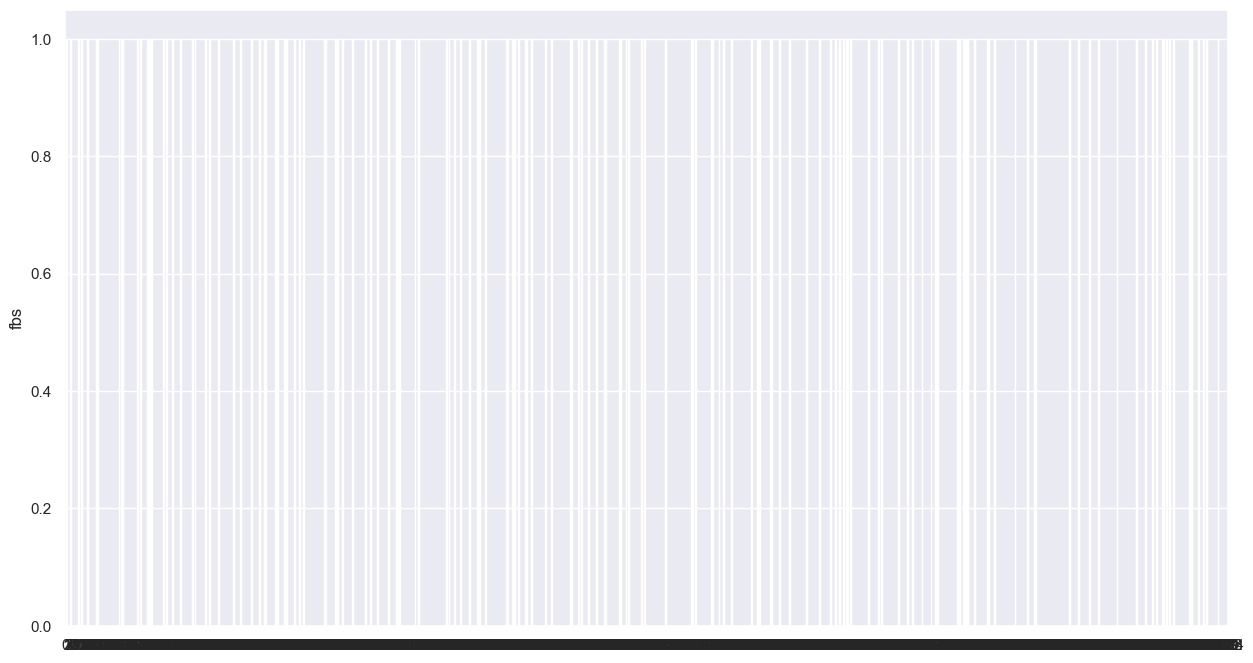

In [93]:
sns.barplot(dataset["fbs"])

In [94]:
dataset["restecg"].unique()

array([1, 0, 2], dtype=int64)

<Axes: ylabel='restecg'>

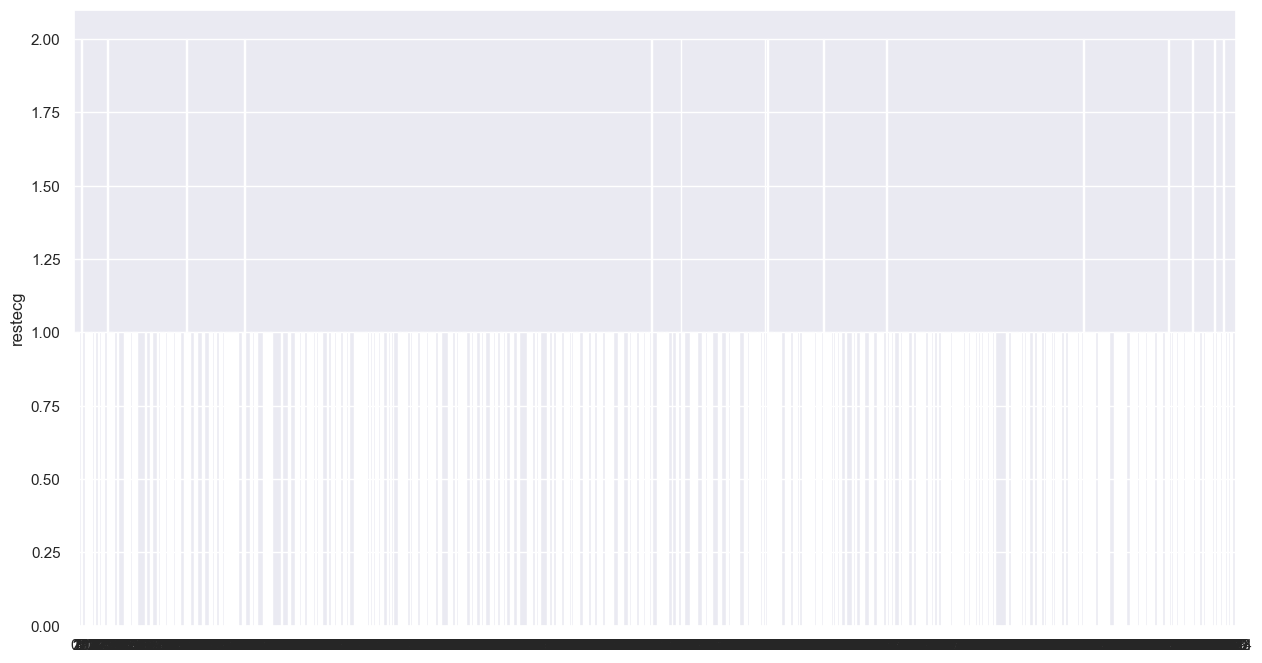

In [95]:
sns.barplot(dataset["restecg"])

In [96]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: ylabel='exang'>

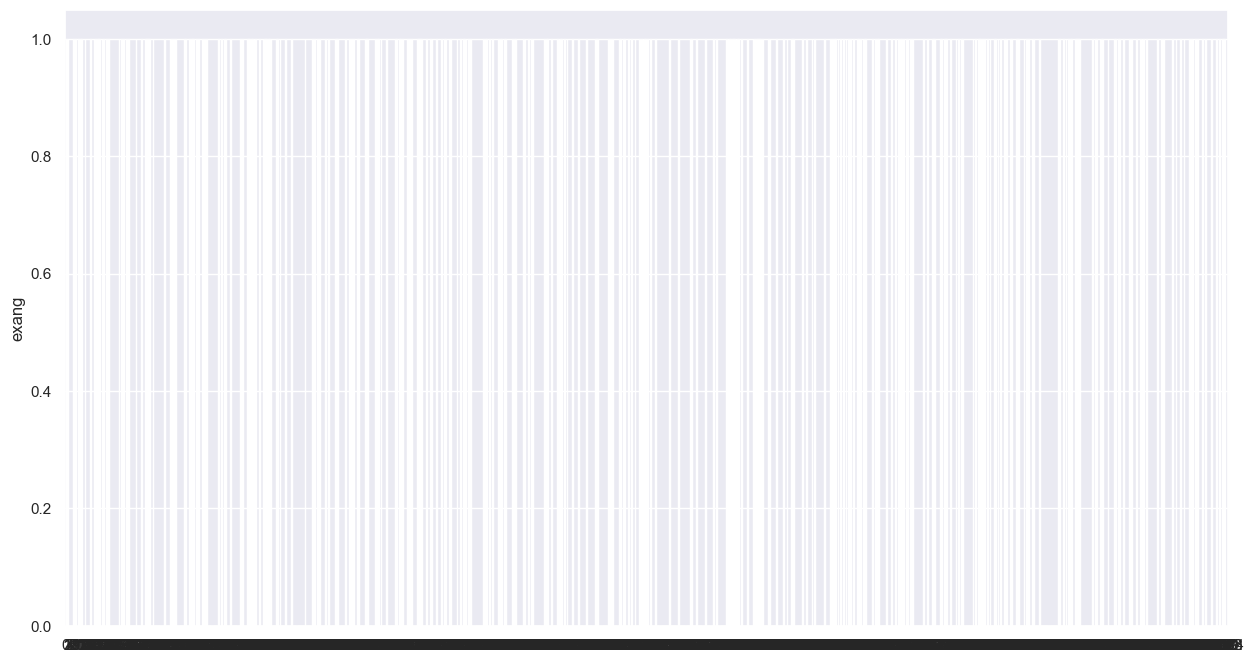

In [97]:
sns.barplot(dataset["exang"])

In [98]:
dataset["slope"].unique()

array([2, 0, 1], dtype=int64)

<Axes: ylabel='slope'>

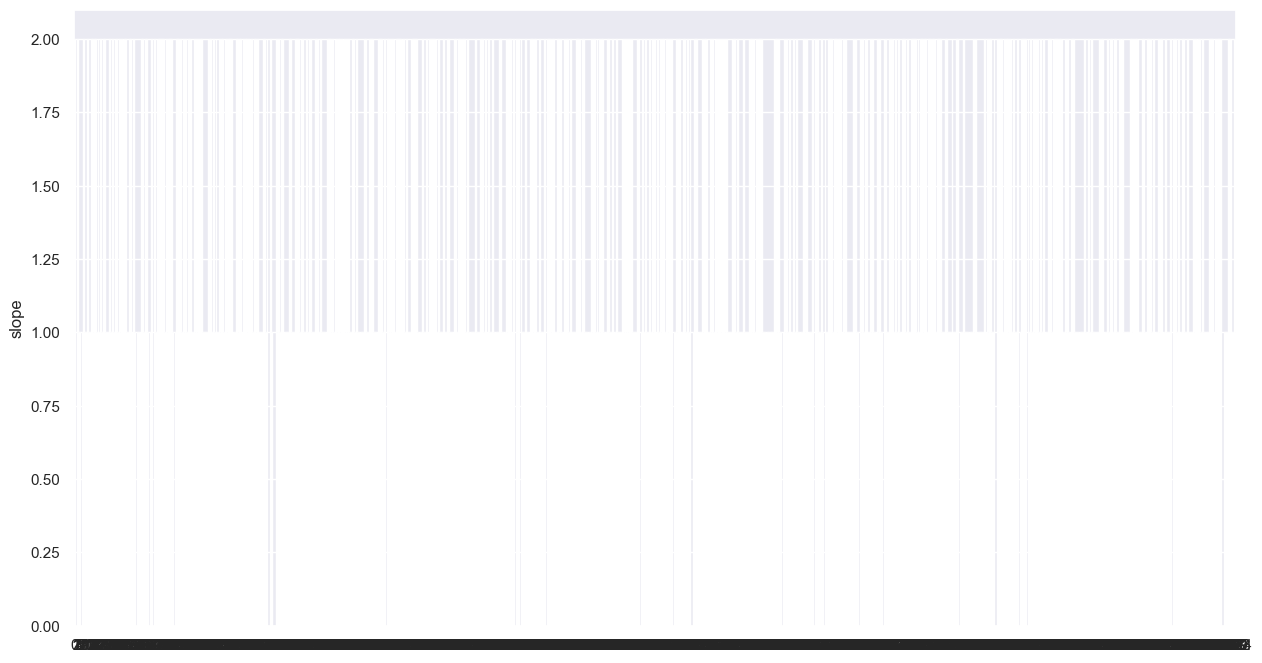

In [99]:
sns.barplot(dataset["slope"])

In [100]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

<Axes: ylabel='count'>

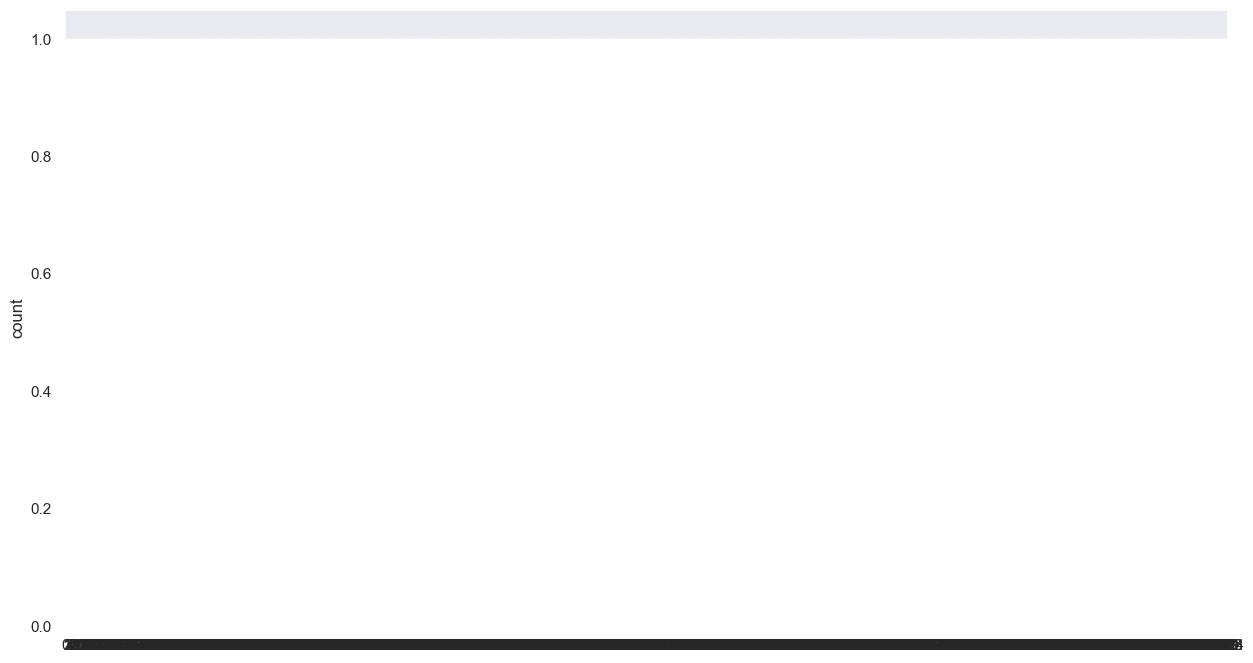

In [101]:
sns.countplot(dataset["ca"])

<Axes: ylabel='ca'>

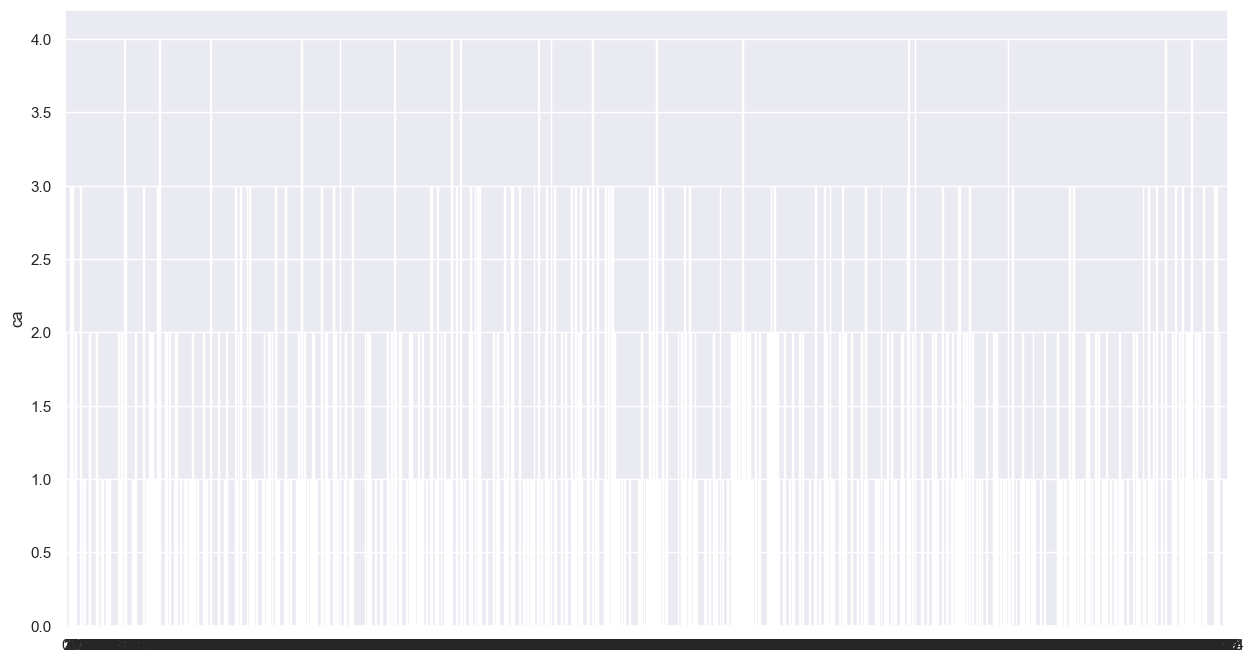

In [102]:
sns.barplot(dataset["ca"])

In [103]:
dataset["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: ylabel='thal'>

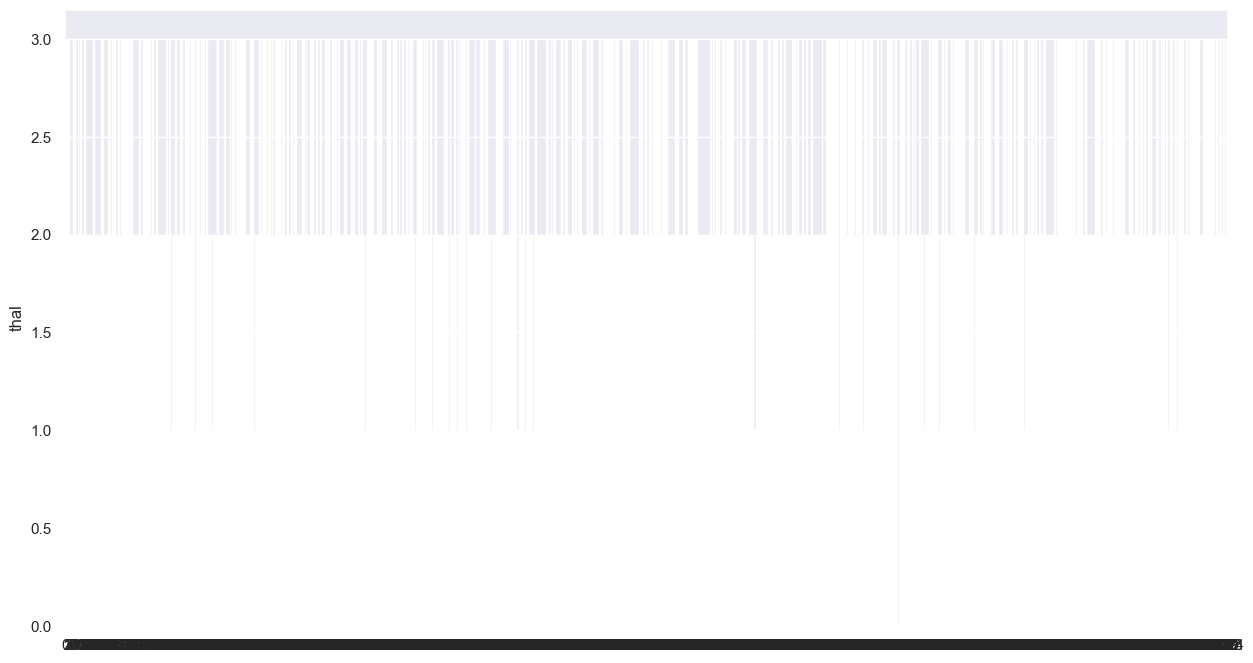

In [104]:
sns.barplot(dataset["thal"])

<Axes: xlabel='thal', ylabel='Density'>

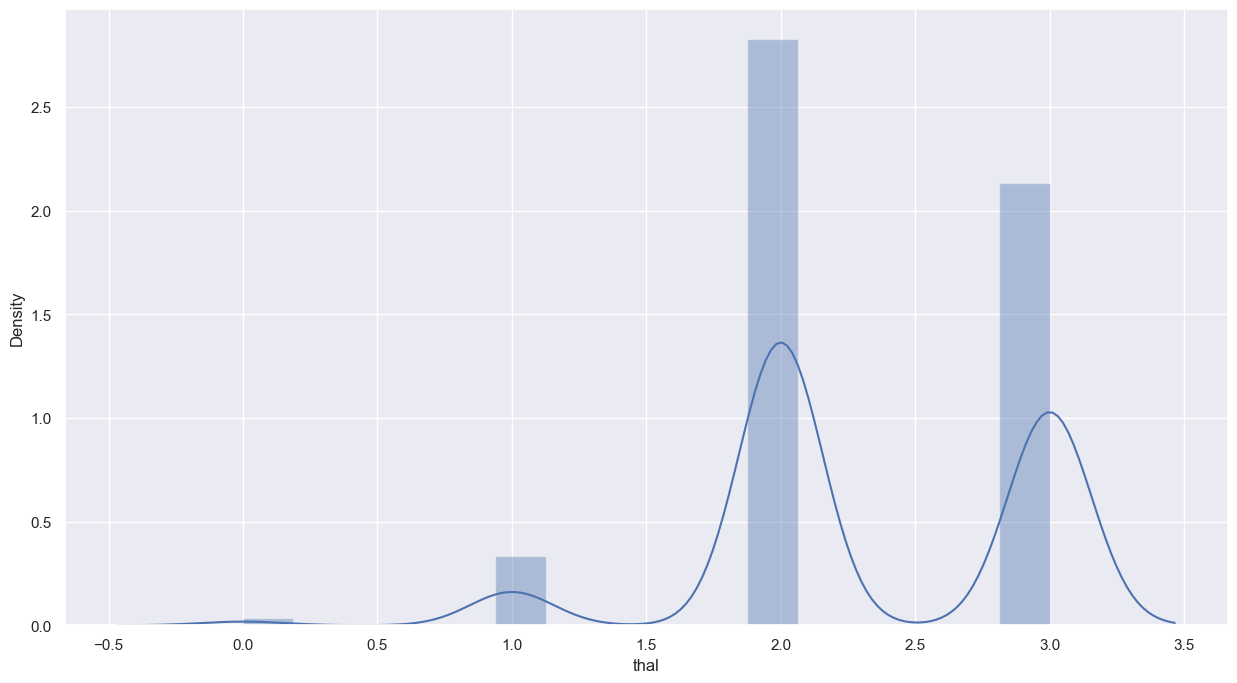

In [105]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [106]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [107]:
X_train.shape

(820, 13)

In [108]:
X_test.shape

(205, 13)

In [109]:
Y_train.shape

(820,)

In [110]:
Y_test.shape

(205,)

## V. Model Fitting

In [111]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [113]:
Y_pred_lr.shape

(205,)

In [114]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


### Naive Bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [116]:
Y_pred_nb.shape

(205,)

In [117]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


### SVM

In [118]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [119]:
Y_pred_svm.shape

(205,)

In [120]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


### K Nearest Neighbors

In [121]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [122]:
Y_pred_knn.shape

(205,)

In [123]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


### Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [125]:
print(Y_pred_dt.shape)

(205,)


In [126]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [128]:
Y_pred_rf.shape

(205,)

In [129]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


### XGBoost

In [130]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [131]:
Y_pred_xgb.shape

(205,)

In [132]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


## VI. Output final score

In [133]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %


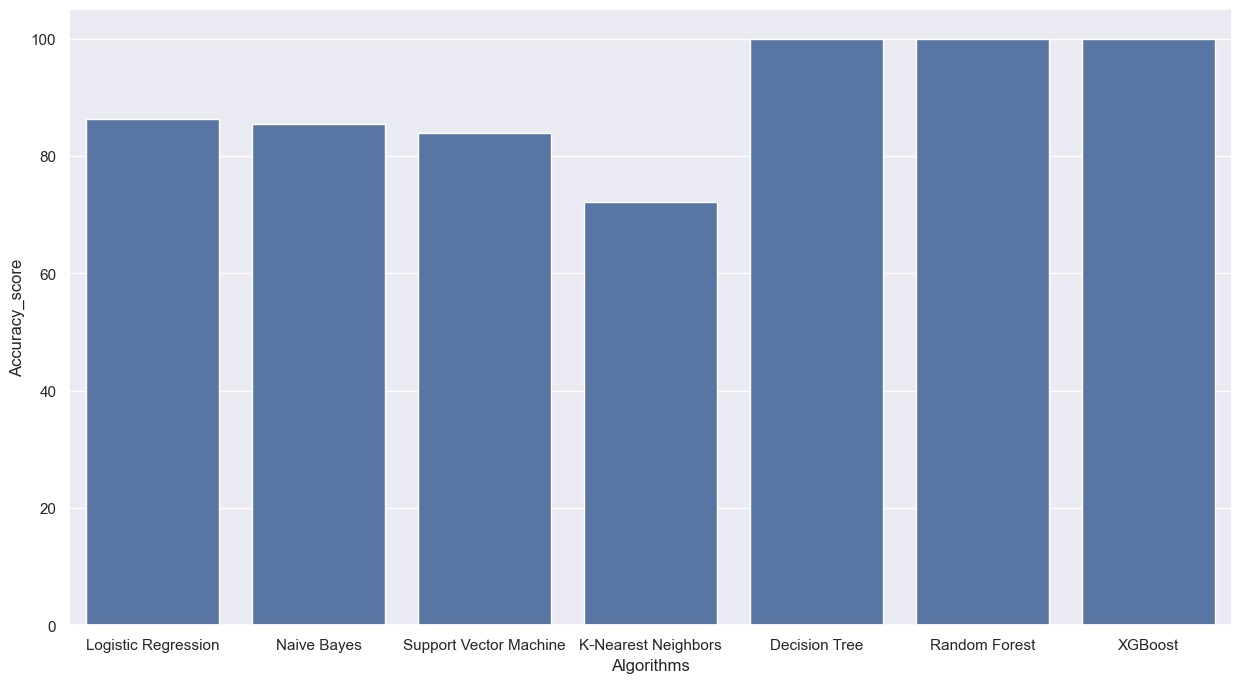

In [134]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy_score")

sns.barplot(x=algorithms,y=scores);

###  random forest has good result as compare to other algorithms <br> <br>

In [135]:
import pickle

In [136]:
pickle.dump(rf,open('modl.pkl','wb'))

In [137]:
pickled_model=pickle.load(open('modl.pkl','rb'))